# Dados e Aprendizagem Automática
### Part VI

## **I - Ensemble Learning using Titanic Dataset**

In [134]:
!pip install xgboost

You may need to install <em>**xgboost**</em>. Use one of the following commands:

<code>conda install -c conda-forge xgboost</code>

<code>pip install xgboost</code>

In [151]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report
%matplotlib inline

*Load the CSV - Titanic*

In [152]:
df = pd.read_csv("titanic.csv")

**EDA**

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


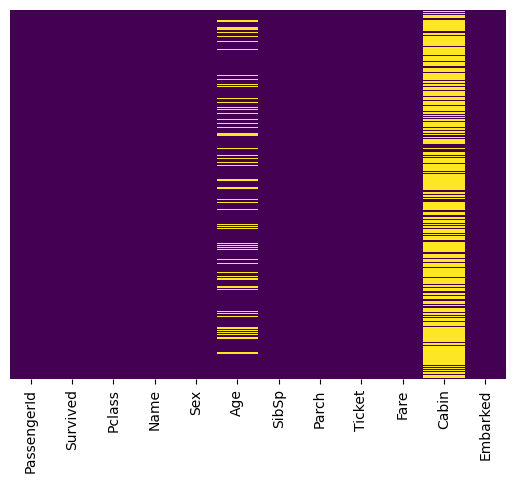

In [155]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Let's analyse the <em>Age</em> distribution with the ticket class, <em>Pclass</em>:

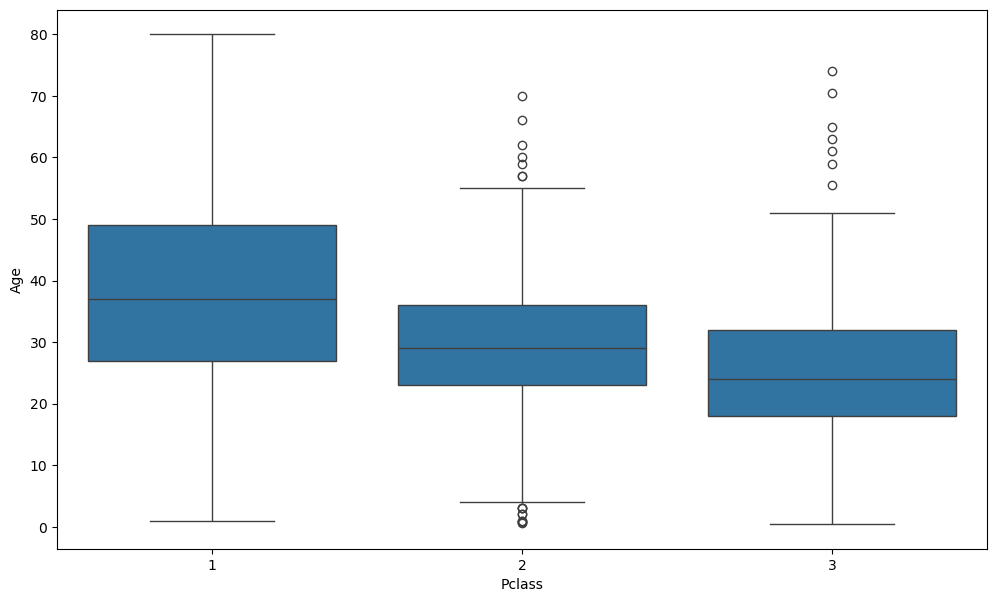

In [156]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.show()

Let's impute the missing values in <em>Age</em> with the ticket class, <em>Pclass</em>:

In [157]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [158]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis =1)

C:\Users\al76413\AppData\Local\Temp\ipykernel_14484\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\al76413\AppData\Local\Temp\ipykernel_14484\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


We will drop features: <em>Cabin</em>, <em>Sex</em>, <em>Embarked</em>, <em>Name</em> and <em>Ticket</em>

In [159]:
df.drop('Cabin', axis = 1, inplace = True)
df.dropna(inplace = True)

In [190]:
df.drop(['Sex','Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [191]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


*Split the data*

In [192]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30 ,random_state = 2022)

In [194]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 6), (622,), (267, 6), (267,))

## **II - Models**

Let's try different models. We will implement a Decision Tree and a Support Vector Machine for comparison with the Ensemble Learning Models.

### Decision Tree

In [195]:
dt_model = DecisionTreeClassifier(max_depth = 2, random_state = 2022)

In [197]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2022)

Accuracy of the model

In [198]:
dt_score = dt_model.score(X_test, y_test)

In [200]:
print("Accuracy: %.2f%%" % (dt_score * 100))

Accuracy: 69.29%


Predictions

In [201]:
dt_predictions = dt_model.predict(X_test)

In [202]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.56      0.56      0.56        94

    accuracy                           0.69       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.69      0.69      0.69       267



Save the model's accuracy in a dictionary for latter comparison

In [203]:
results = {'DT': dt_score}

### Support Vector Machine

<code>sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)</code>

In [204]:
svm_model = SVC(random_state = 2022)

In [205]:
svm_model.fit(X_train, y_train)

SVC(random_state=2022)

Accuracy of the model

In [206]:
svm_score = svm_model.score(X_test, y_test)

In [207]:
print("Accuracy: %.2f%%" % (svm_score *100))

Accuracy: 68.16%


Predictions:

In [208]:
svm_predictions = svm_model.predict(X_test)

In [209]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       173
           1       0.71      0.16      0.26        94

    accuracy                           0.68       267
   macro avg       0.70      0.56      0.53       267
weighted avg       0.69      0.68      0.61       267



Save the model's accuracy

In [210]:
results['SVM'] = svm_score

## **III - Ensemble Learning Models**

### Bagging *(Bootstrap Aggregating)*

<code>sklearn.model_selection.StratifiedShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)</code>

In [211]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 20, random_state = 2022)

<code>sklearn.ensemble.BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)</code>

In [212]:
bg_model = BaggingClassifier(estimator = dt_model, bootstrap = True)

In [213]:
n_estimators = [10, 40, 60, 80, 100, 160]

In [214]:
parameters = {'n_estimators': n_estimators}

In [215]:
grid_bg = GridSearchCV(estimator = bg_model, param_grid = parameters, cv = sss)

In [216]:
grid_bg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=2022, test_size=20,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=2022)),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 160]})

Best estimator

In [217]:
bst_bg_model = grid_bg.best_estimator_

In [218]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022),
                  n_estimators=80)


In [219]:
bst_bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022),
                  n_estimators=80)

Accuracy of the model

In [220]:
bst_bg_score = bst_bg_model.score(X_test, y_test)

In [222]:
print("Accuracy: %.2f%%" % (bst_bg_score*100))

Accuracy: 70.41%


Predictions

In [223]:
bg_predictions = bst_bg_model.predict(X_test)

In [224]:
print(classification_report(y_test, bg_predictions))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       173
           1       0.58      0.55      0.57        94

    accuracy                           0.70       267
   macro avg       0.67      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



Save the model's accuracy

In [225]:
results['Bagg']= bst_bg_score

#### Random Forest

<code>sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)</code>

In [226]:
rf_model = RandomForestClassifier(bootstrap = False, max_depth = 2, verbose =1)

In [227]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

Accuracy of the model

In [228]:
rf_score = rf_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [230]:
print("Accuracy: %.2f%%" % (rf_score *100))

Accuracy: 72.66%


Predictions

In [231]:
rf_predictions = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [232]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       173
           1       0.63      0.53      0.58        94

    accuracy                           0.73       267
   macro avg       0.70      0.68      0.69       267
weighted avg       0.72      0.73      0.72       267



Save the model's accuracy

In [233]:
results['RF'] = rf_score

### Boosting

#### Gradient Boosting

<code>sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0))</code>

In [235]:
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state=2022)

In [236]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2022)

Accuracy of the model

In [237]:
gbc_score = gbc_model.score(X_test, y_test)

In [239]:
print("Accuracy: %.2f%%" % (gbc_score*100))

Accuracy: 71.16%


Predictions

In [240]:
gbc_predictions = gbc_model.predict(X_test)

In [241]:
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       173
           1       0.60      0.53      0.56        94

    accuracy                           0.71       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.71      0.71      0.71       267



Save the model's accuracy

In [242]:
results['GB'] = gbc_score

#### XGBoost

<code>xgboost.sklearn.XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None,colsample_bytree=None, device=None, early_stopping_rounds=None,enable_categorical=False, eval_metric=None, feature_types=None,gamma=None, grow_policy=None, importance_type=None,interaction_constraints=None, learning_rate=None, max_bin=None,max_cat_threshold=None, max_cat_to_onehot=None,max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None,multi_strategy=None, n_estimators=None, n_jobs=None,num_parallel_tree=None, random_state=None, ...)</code>

In [243]:
xgb_model = XGBClassifier(max_depth = 1, objective = 'reg:squarederror')

In [244]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

Accuracy of the model

In [245]:
xgb_score = xgb_model.score(X_test, y_test)

In [246]:
print("Accuracy: %.2f%%" % (xgb_score*100))

Accuracy: 73.03%


Predictions

In [247]:
 xgb_predictions = xgb_model.predict(X_test)

In [248]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       173
           1       0.65      0.51      0.57        94

    accuracy                           0.73       267
   macro avg       0.71      0.68      0.69       267
weighted avg       0.72      0.73      0.72       267



Save the model's accuracy

In [249]:
results['XGB'] = xgb_score

### Stacking

#### StackingClassifier

In [250]:
estimators = [("dt", dt_model), ("svm", svm_model), ("rf", rf_model)]

<code>sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)</code>

In [251]:
st_model = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression()) 

In [252]:
st_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=2022)),
                               ('svm', SVC(random_state=2022)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=2,
                                                       verbose=1))],
                   final_estimator=LogisticRegression())

Accuracy of the model

In [253]:
st_score = st_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [254]:
print("Accuracy: %.2f%%" % (st_score*100))

Accuracy: 72.28%


Predictions

In [255]:
st_predictions = st_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [256]:
print(classification_report(y_test, st_predictions))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       173
           1       0.63      0.51      0.56        94

    accuracy                           0.72       267
   macro avg       0.70      0.67      0.68       267
weighted avg       0.71      0.72      0.72       267



Save the model's accuracy

In [257]:
results['Stack']= st_score

### Max Voting

#### Majority Class Labels (Majority/Hard Voting)

<code>sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)</code>

In [259]:
hvt_model = VotingClassifier(estimators = [("dt", dt_model), ("svm", svm_model), ("rf", rf_model)], voting = 'hard', weights = [2,1,2])

In [260]:
hvt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=2022)),
                             ('svm', SVC(random_state=2022)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=2, verbose=1))],
                 weights=[2, 1, 2])

Accuracy of each model using *cross_val_score*

In [262]:
for model, label in zip([dt_model, svm_model, rf_model, hvt_model], ['dt', 'svm', 'rf', 'Ensemble']):
    hvt_score = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (hvt_score.mean(), hvt_score.std(), label))

Accuracy: 0.69 (+/- 0.05) [dt]
Accuracy: 0.66 (+/- 0.04) [svm]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.70 (+/- 0.06) [rf]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.69 (+/- 0.07) [Ensemble]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy of the max voted model

In [263]:
hvt_score = hvt_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (hvt_score*100))

Accuracy: 70.41%


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Predictions

In [264]:
hvt_predictions = hvt_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [265]:
print(classification_report(y_test, hvt_predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       173
           1       0.58      0.56      0.57        94

    accuracy                           0.70       267
   macro avg       0.67      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



Save the model's accuracy

In [266]:
results['HVotW']= hvt_score

## **IV - Models Accuracy Comparison**

Bar chart with the accuracy of each created model

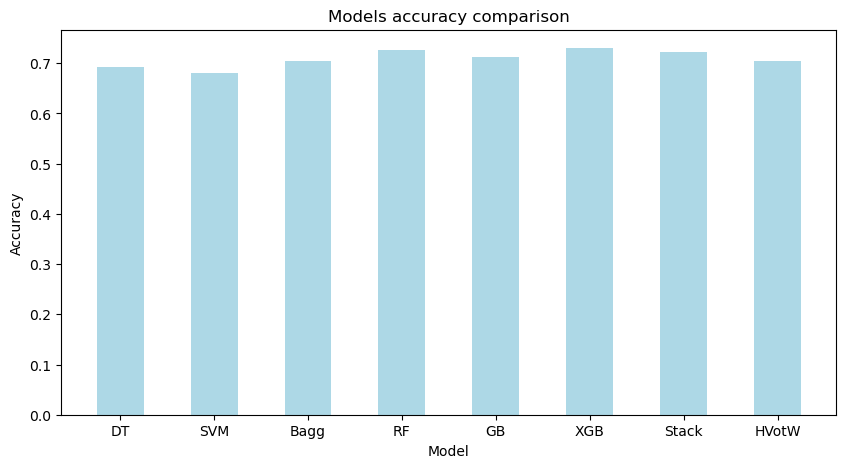

In [269]:
fig = plt.figure(figsize = (10, 5))

mod = list(results.keys())
acc = list(results.values())

plt.bar(mod, acc, color ='lightblue', width = 0.5)
 
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Models accuracy comparison")
plt.show()

Bars' visualization horizontally

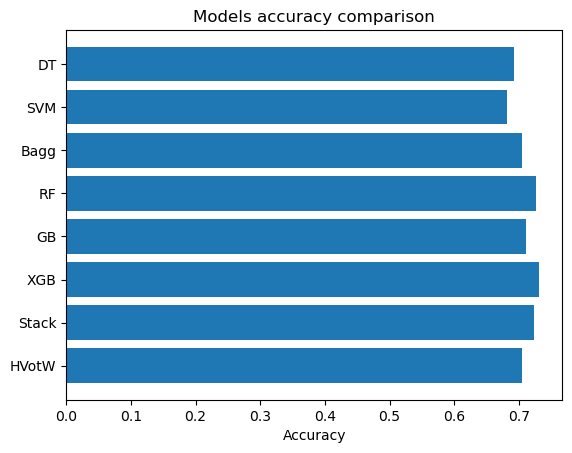

In [270]:
fig, ax = plt.subplots()

y_values = np.arange(len(mod))

ax.barh(y_values, acc, align='center')
ax.set_yticks(y_values, labels = mod)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Models accuracy comparison')

plt.show()

Dictionary  with the results

In [271]:
print("Models accuracy comparison")
for key, value in results.items():
    print("%s \t %.2f" % (key, value))

Models accuracy comparison
DT 	 0.69
SVM 	 0.68
Bagg 	 0.70
RF 	 0.73
GB 	 0.71
XGB 	 0.73
Stack 	 0.72
HVotW 	 0.70


### Which model performed better? Which models are worth tuning?